<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 4 Sprint 2*

# Sprint Challenge - Neural Network Foundations

Table of Problems

1. [Defining Neural Networks](#Q1)
2. [Perceptron on XOR Gates](#Q2)
3. [Multilayer Perceptron](#Q3)
4. [Keras MMP](#Q4)

<a id="Q1"></a>
## 1. Define the following terms:

- **Neuron:**
A Neuron is the basic unit of a neural network. It takes N inputs, weighs them and optionally applies a bias. It then applies an activation function to the sum of all inputs, weights, and bias. Depending on the actiation function, the neuron might activate, not activate, or send a weak signal to the next layer. 
- **Input Layer:**
The input layer is the first layer of the neural network, it will have number of nodes equal to the number of features in the data and apply no activation function, but pass the inputs to the first hidden layer.
- **Hidden Layer:**
The hidden layers do not produce inputs or outputs, they are made up of neurons and behave due to the above description of neurons: they apply weights to the inputs they receive, may add bias, and then apply an activation function, possibly activating and sending a signal to the next layer.

- **Output Layer:**
The output layer will determine the shape of the output from the neural network, for a regression function, it will be a single neuron applying a linear function to the input.

For a binary classification function, it will use a binary activation function, for a multi-classificaiton function, it will use a softmax function.

The number of neurons in the output layer will correspond to the number of output features.

- **Activation:**

Neurons activate according to their activation functions. Sigmoid, Relu, and step are some possible functions, based on the inputs and weights (and bias) applied to the inputs, the function will (or will not) produce an output.

Choosing the activation function depends on the nature of the problem. Relu functions produce a linearly increasing output once the input signal is above zero, and nothing when the input signal is below zero. 

Step functions produce a signal of 1 if the input signal is above zero, and zero below it.

Sigmoid (or tanh which is a transformed sigmoid function) provide a signal of 1 at high inputs and zero at low inputs, with an inbetween output signal between 6 and -6.

- **Backpropagation:**

The process by which neural networks learn. During training, the outputs of the neural network are compared to the true y values to generate an error term, this error term is multiplied by the derivative of the activation function of the output of each layer of the neural network (except the input layer that has no activation function) to create a delta term. The weights of the inputs to each layer are then multiplied by delta term.

Intuitively, we are updating the weights of inputs to our layers by the derivative of our activation functions so as to reduce the error or loss function of our model.


## 2. Perceptron on AND Gates <a id="Q3=2"></a>

Create a perceptron class that can model the behavior of an AND gate. You can use the following table as your training data:

|x1	|x2|x3|	y|
|---|---|---|---|
1|	1|	1|	1|
1|	0|	1|	0|
0|	1|	1|	0|
0|	0|	1|	0|

In [3]:
import numpy as np

# first we format our inputs and outputs

inputs = np.array(([1,1,1],
                   [1,0,1],
                   [0,1,1],
                   [0,0,1]), dtype=float)

correct_outputs = np.array(([1], [0], [0], [0]), dtype=float)

In [7]:
class Perceptron():
    """
    A single layer neural network, aka, a Perceptron
    """
    
    
    def __init__(self, input_size = 3, outputNodes = 1):
  # Set up Architecture of neural network
        self.input = input_size 
        self.outputNodes = outputNodes
        # Initial Weights
        # 3x4 matrix for first layer
        self.weights1 = np.random.randn(self.input, self.outputNodes)
        
        
    def sigmoid(self, s):
        return 1 / (1 + np.exp(-s))
    
    def sigmoidPrime(self, z):
#         return z / (1 + z)
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def feed_forward(self, X):
        """
        Calculate the NN inference using feed forawrd

        """
        #weighted sum of inputs and hidden layer
        self.hidden_sum = np.dot(X, self.weights1)
        #Activations of weighted sums
        self.activated_output = self.sigmoid(self.hidden_sum)
        
        return self.activated_output
    
    def get_attributes(self):
        
        attributes = ['weights1', 'hidden_sum', 'activated_hidden', 'weights2', 'output']

        [print(i + '\n', getattr(nn,i), '\n' + '---'*3) for i in dir(nn) if i in attributes]

    def backward(self, X, y, o):
        """
        Backward propagate through the network
        """
        self.o_error = y - o #error in output
        self.o_delta = self.o_error * self.sigmoidPrime(o) 
        # apply derivative of sigmoid to error

        self.weights1 += X.T.dot(self.o_delta) #Adjust first set (input => hidden) weights
        print('Current Weights: ', self.weights1)
        print('Gradient Adjustment: ', X.T.dot(self.o_delta))
        
    def train(self, X, y):
        o = self.feed_forward(X)
        self.backward(X, y, o)
        

In [8]:
p = Perceptron()

X = inputs
y = correct_outputs

for i in range(10000):
    if (i+1 in [1,2,3,4,5]) or ((i+1) % 50 ==0):
        print('+' + '---' * 3 + f'EPOCH {i+1}' + '---'*3 + '+')
        print('Input: \n', X)
        print('Actual Output: \n', y)
        print('Predicted Output: \n', str(p.feed_forward(X)))
        print("Loss: \n", str(np.mean(np.square(y - p.feed_forward(X)))))
    p.train(X,y)

+---------EPOCH 1---------+
Input: 
 [[1. 1. 1.]
 [1. 0. 1.]
 [0. 1. 1.]
 [0. 0. 1.]]
Actual Output: 
 [[1.]
 [0.]
 [0.]
 [0.]]
Predicted Output: 
 [[0.94493475]
 [0.95475237]
 [0.69955687]
 [0.74113829]]
Loss: 
 0.48831251345420434
Current Weights:  [[ 1.81690289]
 [-0.35072972]
 [ 0.5542626 ]]
Gradient Adjustment:  [[-0.18050559]
 [-0.14402503]
 [-0.49763067]]
+---------EPOCH 2---------+
Input: 
 [[1. 1. 1.]
 [1. 0. 1.]
 [0. 1. 1.]
 [0. 0. 1.]]
Actual Output: 
 [[1.]
 [0.]
 [0.]
 [0.]]
Predicted Output: 
 [[0.88292606]
 [0.91460194]
 [0.55070829]
 [0.63512398]]
Loss: 
 0.38921627484878313
Current Weights:  [[ 1.65434561]
 [-0.45424275]
 [ 0.12017437]]
Gradient Adjustment:  [[-0.16255728]
 [-0.10351303]
 [-0.43408823]]
+---------EPOCH 3---------+
Input: 
 [[1. 1. 1.]
 [1. 0. 1.]
 [0. 1. 1.]
 [0. 0. 1.]]
Actual Output: 
 [[1.]
 [0.]
 [0.]
 [0.]]
Predicted Output: 
 [[0.78922783]
 [0.85501887]
 [0.41725105]
 [0.53000749]]
Loss: 
 0.3076221411193762
Current Weights:  [[ 1.52061756]
 [-0.

In [ ]:
# the loss function and outputs approach a correct weight

## 3. Multilayer Perceptron <a id="Q3"></a>

Implement a Neural Network Multilayer Perceptron class that uses backpropagation to update the network's weights.
Your network must have one hidden layer.
You do not have to update weights via gradient descent. You can use something like the derivative of the sigmoid function to update weights.
Train your model on the Heart Disease dataset from UCI:



In [1]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# download data and seperate columns into categorical vs continuous values

colnames = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 
            'restecg', 'thalach', 'exang', 'oldspeak', 'slope', 'ca', 'thal', 'target']

onehot = ['sex', 'cp', 'fbs', 'restecg','exang', 'slope', 'ca', 'thal']

scale = ['age', 'trestbps', 'chol', 'thalach', 'oldspeak' ]

df = pd.read_csv('processed.cleveland.data', names=colnames)


In [2]:
# clean out some nans, cast object columns to numeric and encode the target as a 
# binary variable
df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)
df['ca'] = pd.to_numeric(df['ca']) 
df['thal'] = pd.to_numeric(df['thal'])
df['target'] = df['target'].map({0:0, 1:1, 2:1, 3:1, 4:1})

In [3]:
# encode data using a column transformer
cleaning_trans = ColumnTransformer(
    [
    ('scaler', StandardScaler(), scale),
    ('hot', OneHotEncoder(), onehot)],
    n_jobs=-1, remainder='passthrough', verbose=True)

In [4]:
cleaning_trans.fit_transform(df)
X = df.drop(columns='target').values
y = df['target'].values
X.shape, y.shape

((297, 13), (297,))

In [13]:
class NueralNetwork():
    """
    A two layer neural network
    """
    
    def __init__(self, input_size = 13, hiddenNodes = 64, outputNodes = 1):
#     def __init__(self, input_size, hiddenNodes, outputNodes):
        # Set up Architecture of neural network
        self.input = input_size 
        self.hiddenNodes = hiddenNodes
        self.outputNodes = outputNodes
        
        # Initial Weights
        # 3x4 matrix for first layer
        self.weights1 = np.random.randn(self.input, self.hiddenNodes)
        #4x1 matrix for hidden to output layer
        self.weights2 = np.random.randn(self.hiddenNodes, self.outputNodes)
        
    def sigmoid(self, s):
        return 1 / (1 + np.exp(-s))
    
    def sigmoidPrime(self, z):
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def feed_forward(self, X):
        """
        Calculate the NN inference using feed forawrd

        """
        #weighted sum of inputs and hidden layer
        self.hidden_sum = np.dot(X, self.weights1)
        
        #Activations of weighted sums
        self.activated_hidden = self.sigmoid(self.hidden_sum)
        

        #Weighted sum between hidden and output
        self.output_sum = np.dot(self.activated_hidden, self.weights2)

        # Final Activation of output
        self.activated_output = self.sigmoid(self.output_sum)


        return self.activated_output
    
    def get_attributes(self):
        
        attributes = ['weights1', 'hidden_sum', 'activated_hidden', 'weights2', 'output']

        [print(i + '\n', getattr(nn,i), '\n' + '---'*3) for i in dir(nn) if i in attributes]

    def backward(self, X, y, o):
        """
        Backward propagate through the network
        """
        self.o_error = y - o #error in output
        self.o_delta = self.o_error * self.sigmoidPrime(o) # apply derivative of sigmoid to error

        self.z2_error = self.o_delta.dot(self.weights2.T) # z2 error: how much our hidden layer weights were off
        self.z2_delta = self.z2_error*self.sigmoidPrime(self.activated_hidden)

        self.weights2 += self.activated_hidden.T.dot(self.o_delta) #adjust second set (hidden => output) weights
        self.weights1 += X.T.dot(self.z2_delta) #Adjust first set (input => hidden) weights

    def train(self, X, y):
        o = self.feed_forward(X)
        self.backward(X, y, o)

In [14]:
# reshape y for network compatibility
y = y.reshape(-1,1)
y.shape, X.shape

((297, 1), (297, 13))

In [17]:
new_nn = NueralNetwork()

loss = {}

for i in range(100000):
    if (i+1 in [1,2,3,4,5]) or ((i+1) % 1000 ==0):
        print('+' + '---' * 3 + f'EPOCH {i+1}' + '---'*3 + '+')
        print('Input: \n', X)
#         print('Actual Output: \n', y)
#         print('Predicted Output: \n', str(new_nn.feed_forward(X)))
        loss[i] = np.mean(np.square(y - new_nn.feed_forward(X)))
        print("Loss: \n", str(loss[i]))
    new_nn.train(X, y)
# print("Loss: \n", str(np.mean(np.square(y - new_nn.feed_forward(X)))))

+---------EPOCH 1---------+
Input: 
 [[63.  1.  1. ...  3.  0.  6.]
 [67.  1.  4. ...  2.  3.  3.]
 [67.  1.  4. ...  2.  2.  7.]
 ...
 [68.  1.  4. ...  2.  2.  7.]
 [57.  1.  4. ...  2.  1.  7.]
 [57.  0.  2. ...  2.  1.  3.]]
Loss: 
 0.4222803707207232
+---------EPOCH 2---------+
Input: 
 [[63.  1.  1. ...  3.  0.  6.]
 [67.  1.  4. ...  2.  3.  3.]
 [67.  1.  4. ...  2.  2.  7.]
 ...
 [68.  1.  4. ...  2.  2.  7.]
 [57.  1.  4. ...  2.  1.  7.]
 [57.  0.  2. ...  2.  1.  3.]]
Loss: 
 0.4612794612794613
+---------EPOCH 3---------+
Input: 
 [[63.  1.  1. ...  3.  0.  6.]
 [67.  1.  4. ...  2.  3.  3.]
 [67.  1.  4. ...  2.  2.  7.]
 ...
 [68.  1.  4. ...  2.  2.  7.]
 [57.  1.  4. ...  2.  1.  7.]
 [57.  0.  2. ...  2.  1.  3.]]
Loss: 
 0.5387162418181718
+---------EPOCH 4---------+
Input: 
 [[63.  1.  1. ...  3.  0.  6.]
 [67.  1.  4. ...  2.  3.  3.]
 [67.  1.  4. ...  2.  2.  7.]
 ...
 [68.  1.  4. ...  2.  2.  7.]
 [57.  1.  4. ...  2.  1.  7.]
 [57.  0.  2. ...  2.  1.  3.]]
Los

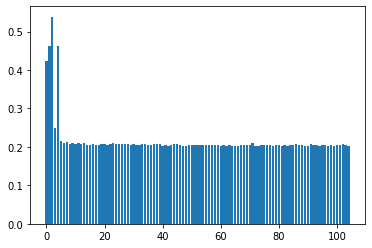

In [27]:
# we can visualize our loss value
import matplotlib.pyplot as plt

plt.bar(range(len(loss)), list(loss.values()))
# plt.xticks(range(len(loss)), list(loss.keys()))
plt.show()

In [ ]:
# basically, within 1000 training epochs we quickly minimize our loss to about 
# .2 and can't do much better with our existing nn architecture

## 4. Keras MMP <a id="Q4"></a>

Implement a Multilayer Perceptron architecture of your choosing using the Keras library. Train your model and report its baseline accuracy. Then hyperparameter tune at least two parameters and report your model's accuracy.
Use the Heart Disease Dataset (binary classification)
Use an appropriate loss function for a binary classification task
Use an appropriate activation function on the final layer of your network.
Train your model using verbose output for ease of grading.
Use GridSearchCV to hyperparameter tune your model. (for at least two hyperparameters)
When hyperparameter tuning, show you work by adding code cells for each new experiment.
Report the accuracy for each combination of hyperparameters as you test them so that we can easily see which resulted in the highest accuracy.
You must hyperparameter tune at least 5 parameters in order to get a 3 on this section.

In [12]:
!conda info --envs

# conda environments:
#
base                     /home/nedderlander/anaconda3
tensorflow_gpu        *  /home/nedderlander/anaconda3/envs/tensorflow_gpu



In [5]:
# create a baseline model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split

# Random Seed
seed = 2001
np.random.seed(seed)

# Important Hyperparameters
inputs = X.shape[1]
epochs = 150
batch_size = 20

# Create our model
model = Sequential()

# input and hidden
model.add(Dense(16, input_dim = inputs, activation='relu'))
# model.add(Dropout(0.3))
# model.add(Dense(64, activation='sigmoid'))
model.add(Dense(1, activation='relu'))

#compile
model.compile(loss='binary_crossentropy',
               optimizer = 'adam',
               metrics=['accuracy'])


# Manual Validation Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, 
                                                    random_state=seed)

W0726 05:05:41.631183 140376000730944 deprecation.py:506] From /home/nedderlander/anaconda3/envs/tensorflow_gpu/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [14]:
history = model.fit(X_train, y_train, batch_size=batch_size, epochs = epochs, validation_split=.1, verbose =0)
scores = model.evaluate(X_test, y_test)
print(f'{model.metrics_names[1]}: {scores[1]*100}')

W0725 14:18:00.355283 140345581893440 deprecation.py:323] From /home/nedderlander/anaconda3/envs/tensorflow_gpu/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


30/30 [==============================] - 0s 27us/sample - loss: 8.1777 - acc: 0.4667
acc: 46.666666865348816


In [ ]:
# our baseline predictive accuracy is 46%

In [28]:
# now to hyper paramater tune
# I'm going to optimize batch size, epochs

from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

# Random Seed
seed = 2001
np.random.seed(seed)

# Important Hyperparameters
inputs = X.shape[1]
# epochs = 50
# batch_size = 32

# Create our model function for the kerasclassifier wrapper
def create_model(dropout_rate=0.0, optimizer = 'adam'):
    model = Sequential()
    # input and hidden
    model.add(Dense(32, input_dim = inputs, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='relu'))

    #compile
    model.compile(loss='binary_crossentropy',
                   optimizer = optimizer,
                   metrics=['accuracy'])
    return model

# create model
model = KerasClassifier(build_fn=create_model, verbose=1)

# create hyper paramaters to optomize
param_grid = {'batch_size': [10, 20, 40, 60, 80, 100],
#               'dropout_rate': [0.1, 0.2, 0.3],
              'epochs': [20, 50]}

# create a grid search
grid = GridSearchCV(estimator=model, cv=5, param_grid=param_grid, n_jobs=1, verbose=1)
grid_results = grid.fit(X, y)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


KeyboardInterrupt: 

In [26]:
# Report Results
print(f"Best: {grid_results.best_score_} using {grid_results.best_params_}")
means = grid_results.cv_results_['mean_test_score']
stds = grid_results.cv_results_['std_test_score']
params = grid_results.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}") 

Best: 0.5387205364126147 using {'batch_size': 60, 'epochs': 50}
Means: 0.5319865300799861, Stdev: 0.05086604397048861 with: {'batch_size': 10, 'epochs': 20}
Means: 0.5252525155191068, Stdev: 0.0524245660726206 with: {'batch_size': 10, 'epochs': 50}
Means: 0.5084175101233652, Stdev: 0.05757752334647228 with: {'batch_size': 20, 'epochs': 20}
Means: 0.5185185169130062, Stdev: 0.055164208520559414 with: {'batch_size': 20, 'epochs': 50}
Means: 0.4949494892298573, Stdev: 0.057969966438716936 with: {'batch_size': 40, 'epochs': 20}
Means: 0.5084175101233652, Stdev: 0.05757752334647228 with: {'batch_size': 40, 'epochs': 50}
Means: 0.5252525320759526, Stdev: 0.056578042823449595 with: {'batch_size': 60, 'epochs': 20}
Means: 0.5387205364126147, Stdev: 0.043436686467891304 with: {'batch_size': 60, 'epochs': 50}
Means: 0.5387205364126147, Stdev: 0.043436686467891304 with: {'batch_size': 80, 'epochs': 20}
Means: 0.4646464598299277, Stdev: 0.04098304818333552 with: {'batch_size': 80, 'epochs': 50}
Me

In [12]:
# batch size looks good at 60
# now I will try different optimizer functions
# I'm goign to use RSCV since gridsearch takes so long to run, this may converge faster

from sklearn.model_selection import RandomizedSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

optimizers = ['Adam', 'Adagrad', 'Adadelta', 'Adamax']
init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']

# Create our model function for the kerasclassifier wrapper
def create_model(dropout_rate=0.0, optimizer = 'adam', init_mode='uniform'):
    model = Sequential()
    # input and hidden
    model.add(Dense(32, input_dim = inputs, kernel_initializer=init_mode, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(16, kernel_initializer=init_mode, activation='relu'))
    model.add(Dense(1, kernel_initializer=init_mode, activation='relu'))

    #compile
    model.compile(loss='binary_crossentropy',
                   optimizer = optimizer,
                   metrics=['accuracy'])
    return model

# create model
model = KerasClassifier(build_fn=create_model, batch_size=60, verbose=1)

# create hyper paramaters to optomize
param_grid = {'batch_size': [60],
#               'dropout_rate': [0.1, 0.2, 0.3],
              'optimizer' : optimizers,
              'init_mode' : init_mode,
              'epochs': [20]}

# create a grid search
grid = RandomizedSearchCV(estimator=model, cv=3, param_distributions=param_grid, n_jobs=1, verbose=1)
grid_results = grid.fit(X, y)

batch_size= 60
epochs= 20

history = model.fit(X_train, y_train, batch_size=batch_size, epochs = epochs, 
                    validation_split=.1, verbose =0)
scores = model.evaluate(X_test, y_test)
print(f'{model.metrics_names[1]}: {scores[1]*100}')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
W0726 05:16:04.922053 140376000730944 deprecation.py:506] From /home/nedderlander/anaconda3/envs/tensorflow_gpu/lib/python3.7/site-packages/tensorflow/python/keras/initializers.py:143: calling RandomNormal.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Epoch 1/20
198/198 [==============================] - 0s 1ms/sample - loss: 4.5527 - acc: 0.5253
Epoch 2/20
198/198 [==============================] - 0s 55us/sample - loss: 2.7065 - acc: 0.5253
Epoch 3/20
198/198 [==============================] - 0s 58us/sample - loss: 2.4939 - acc: 0.5253
Epoch 4/20
198/198 [==============================] - 0s 62us/sample - loss: 2.3773 - acc: 0.5253
Epoch 5/20
198/198 [==============================] - 0s 63us/sample - loss: 2.3044 - acc: 0.5253
Epoch 6/20
198/198 [==============================] - 0s 59us/sample - loss: 2.2495 - acc: 0.5253
Epoch 7/20
198/198 [==============================] - 0s 58us/sample - loss: 2.2103 - acc: 0.5253
Epoch 8/20
198/198 [==============================] - 0s 57us/sample - loss: 2.1746 - acc: 0.5253
Epoch 9/20
198/198 [==============================] - 0s 53us/sample - loss: 2.1474 - acc: 0.5253
Epoch 10/20
198/198 [==============================] - 0s 

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  1.8min finished


Epoch 1/20
297/297 [==============================] - 0s 1ms/sample - loss: 0.7507 - acc: 0.4680
Epoch 2/20
297/297 [==============================] - 0s 50us/sample - loss: 0.7145 - acc: 0.5017
Epoch 3/20
297/297 [==============================] - 0s 48us/sample - loss: 0.6975 - acc: 0.5185
Epoch 4/20
297/297 [==============================] - 0s 48us/sample - loss: 0.6864 - acc: 0.5421
Epoch 5/20
297/297 [==============================] - 0s 51us/sample - loss: 0.6721 - acc: 0.5724
Epoch 6/20
297/297 [==============================] - 0s 52us/sample - loss: 0.6712 - acc: 0.6296
Epoch 7/20
297/297 [==============================] - 0s 51us/sample - loss: 0.6511 - acc: 0.6229
Epoch 8/20
297/297 [==============================] - 0s 49us/sample - loss: 0.6454 - acc: 0.6027
Epoch 9/20
297/297 [==============================] - 0s 49us/sample - loss: 0.6264 - acc: 0.6936
Epoch 10/20
297/297 [==============================] - 0s 50us/sample - loss: 0.6126 - acc: 0.6970
Epoch 11/20
297/297 

AttributeError: 'KerasClassifier' object has no attribute 'evaluate'

In [13]:
# Report Results
print(f"Best: {grid_results.best_score_} using {grid_results.best_params_}")
means = grid_results.cv_results_['mean_test_score']
stds = grid_results.cv_results_['std_test_score']
params = grid_results.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}") 

Best: 0.6936027010281881 using {'optimizer': 'Adam', 'init_mode': 'normal', 'epochs': 20, 'batch_size': 60}
Means: 0.5387205282847086, Stdev: 0.019046638506356135 with: {'optimizer': 'Adamax', 'init_mode': 'normal', 'epochs': 20, 'batch_size': 60}
Means: 0.5050505002339681, Stdev: 0.04285494366377606 with: {'optimizer': 'Adam', 'init_mode': 'lecun_uniform', 'epochs': 20, 'batch_size': 60}
Means: 0.6936027010281881, Stdev: 0.08010355736900938 with: {'optimizer': 'Adam', 'init_mode': 'normal', 'epochs': 20, 'batch_size': 60}
Means: 0.5387205282847086, Stdev: 0.019046638506356135 with: {'optimizer': 'Adam', 'init_mode': 'zero', 'epochs': 20, 'batch_size': 60}
Means: 0.5387205282847086, Stdev: 0.019046638506356135 with: {'optimizer': 'Adamax', 'init_mode': 'zero', 'epochs': 20, 'batch_size': 60}
Means: 0.5420875350634257, Stdev: 0.023808305157419923 with: {'optimizer': 'Adagrad', 'init_mode': 'he_normal', 'epochs': 20, 'batch_size': 60}
Means: 0.5387205282847086, Stdev: 0.01904663850635613

In [14]:
# it looks like adam and normal init provides the best accuracy, now I'll optomize dropout

# Create our model function for the kerasclassifier wrapper
def create_model(dropout_rate=0.0, optimizer = 'adam', init_mode='normal'):
    model = Sequential()
    # input and hidden
    model.add(Dense(32, input_dim = inputs, kernel_initializer=init_mode, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(16, kernel_initializer=init_mode, activation='relu'))
    model.add(Dense(1, kernel_initializer=init_mode, activation='relu'))

    #compile
    model.compile(loss='binary_crossentropy',
                   optimizer = optimizer,
                   metrics=['accuracy'])
    return model

# create model
model = KerasClassifier(build_fn=create_model, batch_size=60, verbose=1)

# create hyper paramaters to optomize
param_grid = {'batch_size': [60],
              'dropout_rate': [0.1, 0.2, 0.3, 0.4, 0.5],
#               'optimizer' : optimizers,
#               'init_mode' : init_mode,
              'epochs': [20]}

# create a grid search
grid = RandomizedSearchCV(estimator=model, cv=3, param_distributions=param_grid, n_jobs=1, verbose=1)
grid_results = grid.fit(X, y)

batch_size= 60
epochs= 20

history = model.fit(X_train, y_train, batch_size=batch_size, epochs = epochs, 
                    validation_split=.1, verbose =0)
scores = model.evaluate(X_test, y_test)
print(f'{model.metrics_names[1]}: {scores[1]*100}')

/home/nedderlander/anaconda3/envs/tensorflow_gpu/lib/python3.7/site-packages/sklearn/model_selection/_search.py:266: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 5 candidates, totalling 15 fits
Epoch 1/20
198/198 [==============================] - 0s 2ms/sample - loss: 1.8592 - acc: 0.4394
Epoch 2/20
198/198 [==============================] - 0s 76us/sample - loss: 0.9582 - acc: 0.5000
Epoch 3/20
198/198 [==============================] - 0s 92us/sample - loss: 1.2343 - acc: 0.5152
Epoch 4/20
198/198 [==============================] - 0s 115us/sample - loss: 1.2765 - acc: 0.5253
Epoch 5/20
198/198 [==============================] - 0s 100us/sample - loss: 1.1820 - acc: 0.5253
Epoch 6/20
198/198 [==============================] - 0s 89us/sample - loss: 1.0044 - acc: 0.5253
Epoch 7/20
198/198 [==============================] - 0s 79us/sample - loss: 0.9510 - acc: 0.5354
Epoch 8/20
198/198 [==============================] - 0s 75us/sample - loss: 0.9482 - acc: 0.5152
Epoch 9/20
198/198 [==============================] - 0s 59us/sample - loss: 0.9483 - acc: 0.5253
Epoch 10/20
198/198 [==============================] - 0s

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  1.3min finished


Epoch 1/20
297/297 [==============================] - 0s 2ms/sample - loss: 1.2008 - acc: 0.5320
Epoch 2/20
297/297 [==============================] - 0s 60us/sample - loss: 0.9687 - acc: 0.5084
Epoch 3/20
297/297 [==============================] - 0s 59us/sample - loss: 0.9689 - acc: 0.5253
Epoch 4/20
297/297 [==============================] - 0s 60us/sample - loss: 0.8134 - acc: 0.5455
Epoch 5/20
297/297 [==============================] - 0s 55us/sample - loss: 0.7802 - acc: 0.5758
Epoch 6/20
297/297 [==============================] - 0s 56us/sample - loss: 0.7809 - acc: 0.5286
Epoch 7/20
297/297 [==============================] - 0s 58us/sample - loss: 0.7731 - acc: 0.5556
Epoch 8/20
297/297 [==============================] - 0s 61us/sample - loss: 0.8145 - acc: 0.5152
Epoch 9/20
297/297 [==============================] - 0s 58us/sample - loss: 0.6929 - acc: 0.5791
Epoch 10/20
297/297 [==============================] - 0s 63us/sample - loss: 0.7484 - acc: 0.5421
Epoch 11/20
297/297 

AttributeError: 'KerasClassifier' object has no attribute 'evaluate'

In [15]:
# Report Results
print(f"Best: {grid_results.best_score_} using {grid_results.best_params_}")
means = grid_results.cv_results_['mean_test_score']
stds = grid_results.cv_results_['std_test_score']
params = grid_results.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}") 

Best: 0.6262626250584921 using {'epochs': 20, 'dropout_rate': 0.2, 'batch_size': 60}
Means: 0.5959596037864685, Stdev: 0.07867556083235085 with: {'epochs': 20, 'dropout_rate': 0.1, 'batch_size': 60}
Means: 0.6262626250584921, Stdev: 0.09183959992648719 with: {'epochs': 20, 'dropout_rate': 0.2, 'batch_size': 60}
Means: 0.5488215486208597, Stdev: 0.048325610825079864 with: {'epochs': 20, 'dropout_rate': 0.3, 'batch_size': 60}
Means: 0.5454545418421427, Stdev: 0.021820670271058235 with: {'epochs': 20, 'dropout_rate': 0.4, 'batch_size': 60}
Means: 0.5353535215059916, Stdev: 0.021820670271058235 with: {'epochs': 20, 'dropout_rate': 0.5, 'batch_size': 60}


In [20]:
# .2 seems the be the best so I'll train on more epochs now

# Random Seed
seed = 2001
np.random.seed(seed)

# Important Hyperparameters
inputs = X.shape[1]
epochs = 6000
batch_size = 60
dropout_rate = 0.2
init_mode = 'normal'

# Create our model
model = Sequential()


# input and hidden
model.add(Dense(32, input_dim = inputs, kernel_initializer=init_mode, activation='relu'))
model.add(Dropout(dropout_rate))
model.add(Dense(16, kernel_initializer=init_mode, activation='relu'))
model.add(Dense(1, kernel_initializer=init_mode, activation='relu'))

#compile
model.compile(loss='binary_crossentropy',
               optimizer = 'adam',
               metrics=['accuracy'])


# Manual Validation Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, 
                                                    random_state=seed)

In [22]:
history = model.fit(X, y, batch_size=batch_size, epochs = epochs, validation_split=.1, verbose =1)
scores = model.evaluate(X_test, y_test)
print(f'{model.metrics_names[1]}: {scores[1]*100}')

Train on 267 samples, validate on 30 samples
Epoch 1/6000
267/267 [==============================] - 0s 104us/sample - loss: 0.6883 - acc: 0.5543 - val_loss: 0.7410 - val_acc: 0.4000
Epoch 2/6000
267/267 [==============================] - 0s 136us/sample - loss: 0.6886 - acc: 0.5543 - val_loss: 0.7397 - val_acc: 0.4000
Epoch 3/6000
267/267 [==============================] - 0s 126us/sample - loss: 0.6886 - acc: 0.5543 - val_loss: 0.7382 - val_acc: 0.4000
Epoch 4/6000
267/267 [==============================] - 0s 110us/sample - loss: 0.6883 - acc: 0.5543 - val_loss: 0.7374 - val_acc: 0.4000
Epoch 5/6000
267/267 [==============================] - 0s 107us/sample - loss: 0.6877 - acc: 0.5543 - val_loss: 0.7366 - val_acc: 0.4000
Epoch 6/6000
267/267 [==============================] - 0s 97us/sample - loss: 0.6882 - acc: 0.5543 - val_loss: 0.7362 - val_acc: 0.4000
Epoch 7/6000
267/267 [==============================] - 0s 102us/sample - loss: 0.6881 - acc: 0.5543 - val_loss: 0.7358 - val_ac

In [31]:
loss = history.history
history.params

{'batch_size': 60,
 'epochs': 6000,
 'steps': None,
 'samples': 267,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'acc', 'val_loss', 'val_acc']}

In [36]:
loss.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

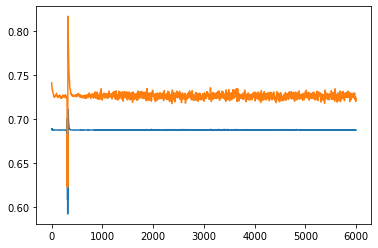

In [41]:
# we can plot the loss function so see our training and validation loss
import matplotlib.pyplot as plt
plt.plot(range(len(loss['loss'])), list(loss['loss']))
plt.plot(range(len(loss['val_loss'])), list(loss['val_loss']))
# plt.xticks(range(len(loss)), list(loss.keys()))
plt.show()

In [42]:
# looks like we converged very quickly to a minum loss

# .2 seems the be the best so I'll train on more epochs now

# Random Seed
seed = 2001
np.random.seed(seed)

# Important Hyperparameters
inputs = X.shape[1]
epochs = 400
batch_size = 60
dropout_rate = 0.2
init_mode = 'normal'

# Create our model
model = Sequential()


# input and hidden
model.add(Dense(32, input_dim = inputs, kernel_initializer=init_mode, activation='relu'))
model.add(Dropout(dropout_rate))
model.add(Dense(16, kernel_initializer=init_mode, activation='relu'))
model.add(Dense(1, kernel_initializer=init_mode, activation='relu'))

#compile
model.compile(loss='binary_crossentropy',
               optimizer = 'adam',
               metrics=['accuracy'])


# Manual Validation Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, 
                                                    random_state=seed)

history = model.fit(X, y, batch_size=batch_size, epochs = epochs, validation_split=.1, verbose =1)
scores = model.evaluate(X_test, y_test)
print(f'{model.metrics_names[1]}: {scores[1]*100}')

Train on 267 samples, validate on 30 samples
Epoch 1/400
267/267 [==============================] - 2s 7ms/sample - loss: 0.7626 - acc: 0.5581 - val_loss: 0.9462 - val_acc: 0.4000
Epoch 2/400
267/267 [==============================] - 0s 85us/sample - loss: 0.8567 - acc: 0.5543 - val_loss: 0.9346 - val_acc: 0.4000
Epoch 3/400
267/267 [==============================] - 0s 136us/sample - loss: 0.7423 - acc: 0.5543 - val_loss: 0.8176 - val_acc: 0.4000
Epoch 4/400
267/267 [==============================] - 0s 93us/sample - loss: 0.6999 - acc: 0.5805 - val_loss: 0.7287 - val_acc: 0.4667
Epoch 5/400
267/267 [==============================] - 0s 138us/sample - loss: 0.6846 - acc: 0.5618 - val_loss: 0.7463 - val_acc: 0.4000
Epoch 6/400
267/267 [==============================] - 0s 101us/sample - loss: 0.7091 - acc: 0.5955 - val_loss: 0.8089 - val_acc: 0.4000
Epoch 7/400
267/267 [==============================] - 0s 138us/sample - loss: 0.6770 - acc: 0.5693 - val_loss: 0.8144 - val_acc: 0.4000


In [43]:
loss = history.history
history.params

{'batch_size': 60,
 'epochs': 400,
 'steps': None,
 'samples': 267,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'acc', 'val_loss', 'val_acc']}

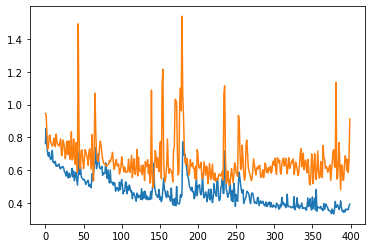

In [44]:
# we can plot the loss function so see our training and validation loss
import matplotlib.pyplot as plt
plt.plot(range(len(loss['loss'])), list(loss['loss']))
plt.plot(range(len(loss['val_loss'])), list(loss['val_loss']))
# plt.xticks(range(len(loss)), list(loss.keys()))
plt.show()

In [45]:
# that looks much better, we see validation loss plateuaing after round 250 while training loss continues to reduce by overfitting, we can save our model and go home
history.model.save('heart_disease_predicter.h5')  # creates a HDF5 file '
del history.model  # deletes the existing model